#### question no.1

 #### A F&B manager wants to determine whether there is any significant differencein the diameter of the cutlet between two units. A randomly selected sample of cutletswas collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out tocheck validity of the assumptions.Minitab File : Cutlets.mtw


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
cutlets=pd.read_csv('Cutlets.csv')

In [3]:
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
unitA=pd.Series(cutlets.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [5]:
unitB = pd.Series(cutlets.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [6]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [7]:
cutlets.tail()

,Unit A,Unit B
30,6.7794,7.0992
31,7.2783,7.1180
32,7.1561,6.6965
33,7.3943,6.5780
34,6.9405,7.3875


In [8]:
cutlets.info

<bound method DataFrame.info of     Unit A  Unit B
0   6.8090  6.7703
1   6.4376  7.5093
2   6.9157  6.7300
3   7.3012  6.7878
4   7.4488  7.1522
5   7.3871  6.8110
6   6.8755  7.2212
7   7.0621  6.6606
8   6.6840  7.2402
9   6.8236  7.0503
10  7.3930  6.8810
11  7.5169  7.4059
12  6.9246  6.7652
13  6.9256  6.0380
14  6.5797  7.1581
15  6.8394  7.0240
16  6.5970  6.6672
17  7.2705  7.4314
18  7.2828  7.3070
19  7.3495  6.7478
20  6.9438  6.8889
21  7.1560  7.4220
22  6.5341  6.5217
23  7.2854  7.1688
24  6.9952  6.7594
25  6.8568  6.9399
26  7.2163  7.0133
27  6.6801  6.9182
28  6.9431  6.3346
29  7.0852  7.5459
30  6.7794  7.0992
31  7.2783  7.1180
32  7.1561  6.6965
33  7.3943  6.5780
34  6.9405  7.3875>

In [9]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [10]:
cutlets.columns

Index(['Unit A', 'Unit B'], dtype='object')

In [11]:
cutlets.shape

(35, 2)

In [12]:
cutlets.isnull()

,Unit A,Unit B
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [13]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [14]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


In [15]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


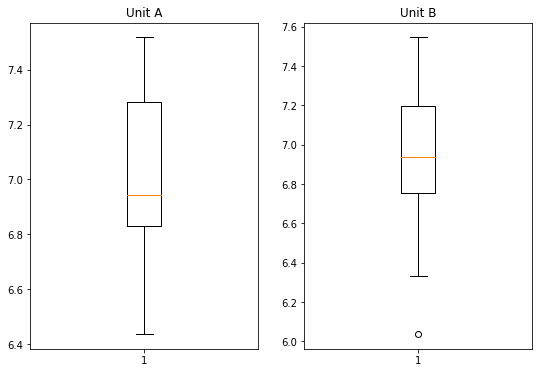

In [16]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

In [17]:
statistic, p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value )

p_value= 0.4722394724599501


In [18]:
     alpha = 0.025
if p_value <= 0.025:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null Hypothesis')

We fail to reject Null Hypothesis


#### question no.2

  #### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.Minitab File: LabTAT.mtw



In [19]:
data=pd.read_csv('LabTAT.csv')
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [21]:
data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [22]:
Lab_1 = data['Laboratory 1'].mean()
Lab_2 = data['Laboratory 2'].mean()
Lab_3 = data['Laboratory 3'].mean()
Lab_4 = data['Laboratory 4'].mean()

In [23]:
print("Mean of Laboratory 1 =",Lab_1)
print("Mean of Laboratory 2 =",Lab_2)
print("Mean of Laboratory 3 =",Lab_3)
print("Mean of Laboratory 4 =",Lab_4)

Mean of Laboratory 1 = 178.36158333333339
Mean of Laboratory 2 = 178.9029166666668
Mean of Laboratory 3 = 199.91325000000003
Mean of Laboratory 4 = 163.6827499999999


In [24]:
print('Laboratory_1 > Laboratory_2 =',Lab_1 > Lab_2)
print('Laboratory_2 > Laboratory_3 =',Lab_2 > Lab_3)
print('Laboratory_3 > Laboratory_4 =',Lab_3 > Lab_4)
print('Laboratory_4 > Laboratory_1 =',Lab_4 > Lab_1)

Laboratory_1 > Laboratory_2 = False
Laboratory_2 > Laboratory_3 = False
Laboratory_3 > Laboratory_4 = True
Laboratory_4 > Laboratory_1 = False


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

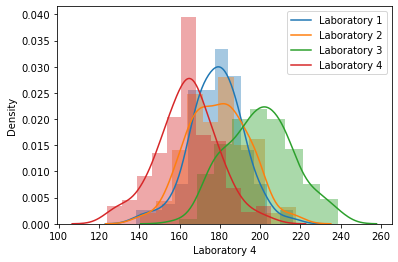

In [25]:
sns.distplot(data['Laboratory 1'])
sns.distplot(data['Laboratory 2'])
sns.distplot(data['Laboratory 3'])
sns.distplot(data['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

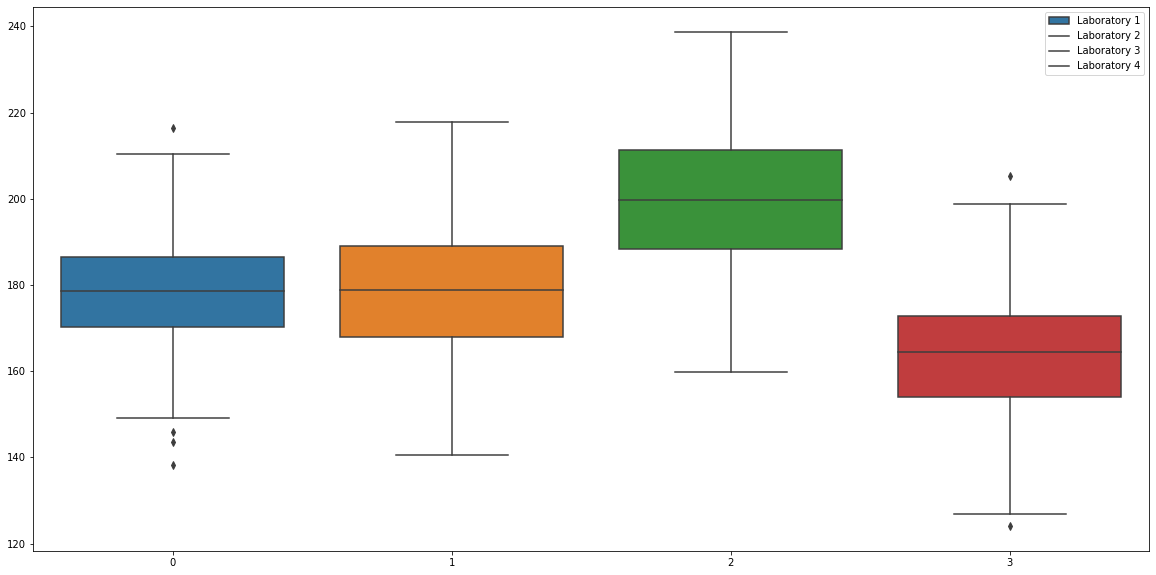

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=[data['Laboratory 1'],data['Laboratory 2'],data['Laboratory 3'],data['Laboratory 4']])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

In [27]:
Lab1 = pd.DataFrame(data['Laboratory 1'])
Lab2 = pd.DataFrame(data['Laboratory 2'])
Lab3 = pd.DataFrame(data['Laboratory 3'])
Lab4 = pd.DataFrame(data['Laboratory 4'])

In [28]:
tStat, pvalue = sp.stats.f_oneway(Lab1,Lab2,Lab3,Lab4)

In [29]:
print("T-statastic =",tStat)

T-statastic = [118.70421654]


In [30]:
if pvalue < 0.05:
    print('we have to the reject null hypothesis')
else:
    print('we have to accept null hypothesis')

we have to the reject null hypothesis


#### question no.3

#### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


In [31]:
data = pd.read_csv('BuyerRatio.csv')
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [32]:
Male = pd.Series(data.iloc[0,:])
Male

Observed Values    Males
East                  50
West                 142
North                131
South                 70
Name: 0, dtype: object

In [33]:
Female = pd.Series(data.iloc[1,:])
Female

Observed Values    Females
East                   435
West                  1523
North                 1356
South                  750
Name: 1, dtype: object

In [34]:
data = data.iloc[:,1:]

In [35]:
data

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [36]:
chi2_score,p_val,dof,expected =stats.chi2_contingency([data])
print('CHI SQUARE TEST RESULT')

print('chi2 value     :' ,chi2_score)
print('p_value        :' ,p_val)
print('dof            :' ,dof)
print('\n')
print('expected table :' ,expected)


CHI SQUARE TEST RESULT
chi2 value     : 1.595945538661058
p_value        : 0.6603094907091882
dof            : 3


expected table : [[[  42.76531299  146.81287862  131.11756787   72.30424052]
  [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]]


In [37]:
if p_value < 0.05:
    print('We have to reject the null hypothesis (H0)')
else:
    print('We can not reject the null hypothesis (H0)')

We can not reject the null hypothesis (H0)


#### question no.4

#### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferencesMinitab File: CustomerOrderForm.mtw


In [38]:
customer_data = pd.read_csv('Costomer+OrderForm.csv')
customer_data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [39]:
c1 = customer_data['Phillippines'].value_counts()
c2 = customer_data['Indonesia'].value_counts()
c3 = customer_data['Malta'].value_counts()
c4 = customer_data['India'].value_counts()

In [40]:
c1,c2,c3,c4

(Error Free    271
 Defective      29
 Name: Phillippines, dtype: int64,
 Error Free    267
 Defective      33
 Name: Indonesia, dtype: int64,
 Error Free    269
 Defective      31
 Name: Malta, dtype: int64,
 Error Free    280
 Defective      20
 Name: India, dtype: int64)

In [41]:
chi2_score,p_val,dof,expected =stats.chi2_contingency([c1,c2,c3,c4])
print('CHI SQUARE TEST RESULT')

print('chi2 value     :' ,chi2_score)
print('p_value        :' ,p_val)
print('dof            :' ,dof)
print('\n')
print('expected table :' ,expected)

CHI SQUARE TEST RESULT
chi2 value     : 3.8589606858203545
p_value        : 0.2771020991233144
dof            : 3


expected table : [[271.75  28.25]
 [271.75  28.25]
 [271.75  28.25]
 [271.75  28.25]]


In [42]:
if p_val<0.05:
    print('We have to reject the null hypothesis (H0) and we can say that the defective % varies by centre')
else:
    print('We can not reject the null hypothesis (H0) and we can say that the defective % do not varies by centre.')

We can not reject the null hypothesis (H0) and we can say that the defective % do not varies by centre.
